# 🎄 **The Merry X-Mas Plot**

## 🎅 **Step 1:** HO-HO-HO! 
* Let's first import the necessary libraries
* Check for file existence.

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt


def validate_file(csv_file):
    """
    🎁 Checks if the CSV file exists on disk.
    Returns True if it exists, otherwise prints an error and returns False.
    """
    if not os.path.isfile(csv_file):
        print(f"Error: The file '{csv_file}' does not exist. ❌")
        return False
    return True


## 🎅 **Step 2:** Load the Christmas-themed data

In [6]:
def load_and_check_csv(csv_file):
    """
    🎁 Reads the CSV file with 'X', 'Y', and 'Letter'.
    Returns a validated DataFrame or None if issues are found.
    """
    try:
        df = pd.read_csv(csv_file, comment='#')  
        # ❄️ Lines starting with '#' are comments (like hidden Christmas wishes).
    except pd.errors.EmptyDataError:
        print(f"Error: The file '{csv_file}' is empty or unreadable. ❌")
        return None
    except Exception as e:
        print(f"Error: Could not read the file. Details: {e}")
        return None
    
    # Check for required columns
    required_cols = ['X', 'Y', 'Letter']
    for col in required_cols:
        if col not in df.columns:
            print(f"Error: Missing required column '{col}' in CSV. ❌")
            return None

    # Check for empty DataFrame
    if df.empty:
        print("Error: No data found in the CSV file. ❌")
        return None
    
    return df


## 🎁 **Step 3:** Create the canvas for our Christmas artwork

In [7]:
def plot_merry_xmas(df):
    """
    🎄 Takes a DataFrame with columns 'X', 'Y', 'Letter' 
    and plots the letters forming "MERRY X-MAS".
    """
    # 🌟 Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))

    # 🎁 Extract the unique letters
    letters = df['Letter'].dropna().unique()

    # 🎅 Loop through each letter
    for letter in letters:
        # Subset the data for this letter
        sub = df[df['Letter'] == letter]

        # 🎁 Identify rows where X or Y is NaN (pen-lift moments)
        nan_rows = sub[sub[['X', 'Y']].isna().any(axis=1)].index

        start = 0
        # Move through each row to split segments
        for i in range(len(sub)):
            if i in nan_rows or i == len(sub) - 1:
                end = i if i in nan_rows else i + 1
                seg = sub.iloc[start:end].dropna(subset=['X', 'Y'])
                
                # Plot only segments with 2+ points
                if len(seg) > 1:
                    ax.plot(seg['X'], seg['Y'], marker='o')
                start = i + 1

    # 🎄 Final touches
    #ax.set_title("The Merry X-Mas Plot", fontsize=14, color="green")
    ax.set_title("Wishing a Pythonic MERRY X-MAS", fontsize=16, color="red")

    ax.set_aspect('equal', 'datalim')
    ax.grid(True)


# 🎀 **Final touches:** Show the festive plot

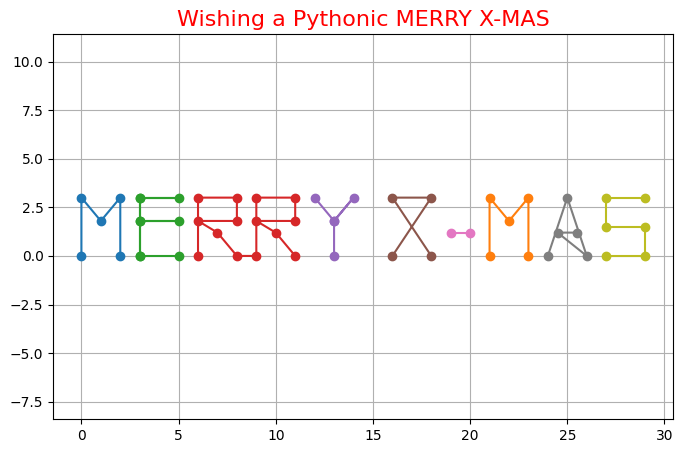

In [8]:
# 🎉 Cell to run everything and show the plot
csv_file = "merry_xmas.csv"

# Step 1: Validate file
if validate_file(csv_file):
    # Step 2: Load and check CSV
    df = load_and_check_csv(csv_file)
    
    if df is not None:
        # Step 3: Plot
        plot_merry_xmas(df)
        # Step 4: Show the figure
        plt.show()
